In [3]:
from network import DistDelayNetwork, sigmoid_activation, tanh_activation
from simulator import NetworkSimulator
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", font_scale=2, palette='deep', context='paper', rc=custom_params)

# Visualizing decay and delay
Standard ESNs implement memory through the leak/decay parameter $\alpha$ and recurrent connections. DDNs include "pure" delays as well. In this notebook, the different effect of the two on reservoir neurons is shown. For this we consider a simple network consisting of just an input neuron and a reservoir neuron.

In [50]:
def network_d1(alpha, dt, act_func):
    """
    Simple network of the shape (in) ---d---> (out)
    """
    W = np.array(
        [
            [0.0, 0.0],
            [1.0, 0.0]
        ]
    )
    B = np.array([0, 0], dtype=float)

    coordinates = np.array(
        [
            [0, 0],
            [.1, .1]
        ]
    )

    n_type = np.array([1, 1], dtype=float)
    decay = np.array([1, 1], dtype=float) * alpha

    test_net = DistDelayNetwork(W, B, n_type, coordinates, decay,
                                input_n=np.array([0]), output_n=np.array([-1]), activation_func=act_func, dt=dt)

    return test_net

def network_d2(alpha, dt, act_func):
    """
    Simple network of the shape (in) ---d---> (A) -> (out)
    """
    W = np.array(
        [
            [0.0, 0.0, 0.0],
            [1.0, 0.0, 0.0],
            [0.0, 1.0, 0.0],
        ]
    )
    B = np.array([0, 0, 0], dtype=float)

    coordinates = np.array(
        [
            [0, 0],
            [.1, .1],
            [.10001, .9999]
        ]
    )

    n_type = np.array([1, 1, 1], dtype=float)
    decay = np.array([1, 1, 1], dtype=float) * alpha

    test_net = DistDelayNetwork(W, B, n_type, coordinates, decay,
                                input_n=np.array([0]), output_n=np.array([-1]), activation_func=act_func, dt=dt)

    return test_net

def network_d3(alpha, dt, act_func):
    """
    Simple network of the shape (in) ---d---> (A) -> (B) -> (out)
    """
    W = np.array(
        [
            [0.0, 0.0, 0.0, 0.0],
            [1.0, 0.0, 0.0, 0.0],
            [0.0, 1.0, 0.0, 0.0],
            [0.0, 0.0, 1.0, 0.0],
        ]
    )
    B = np.array([0, 0, 0, 0], dtype=float)

    coordinates = np.array(
        [
            [0, 0],
            [.1, .1],
            [.10001, .9999],
            [.1, .9999]
        ]
    )

    n_type = np.array([1, 1, 1, 1], dtype=float)
    decay = np.array([1, 1, 1, 1], dtype=float) * alpha

    test_net = DistDelayNetwork(W, B, n_type, coordinates, decay,
                                input_n=np.array([0]), output_n=np.array([-1]), activation_func=act_func, dt=dt)

    return test_net


def network_r2(alpha, dt, act_func):
    """
    Simple network of the shape (in) ---d---> (A) -> (out)
    """
    W = np.array(
        [
            [0.0, 0.0, 0.0],
            [1.0, 0.0, 1.0],
            [0.0, 1.0, 0.0],
        ]
    ) * 2
    B = np.array([0, 0, 0], dtype=float)

    coordinates = np.array(
        [
            [0, 0],
            [.1, .1],
            [.10001, .9999]
        ]
    )

    n_type = np.array([1, 1, 1], dtype=float)
    decay = np.array([1, 1, 1], dtype=float) * alpha

    test_net = DistDelayNetwork(W, B, n_type, coordinates, decay,
                                input_n=np.array([0]), output_n=np.array([-1]), activation_func=act_func, dt=dt)

    return test_net


Run cell below to see a GUI visualization of this network

RuntimeError: Too early to create image: no default root window

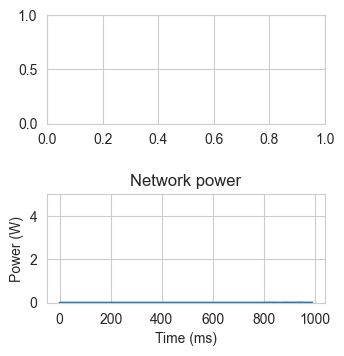

In [4]:
test_net = network_d1(1, .01, tanh_activation)
sim = NetworkSimulator(test_net, False)
sim.visualize(np.random.uniform(size=200))

### Effect of decay and delay on input response
Loop through different delays and decays; measure response to a step function input

Below for simple networks of the shape (in) ---> (out)

Text(0.5, 1.0, 'DDN tanh neuron response to step input')

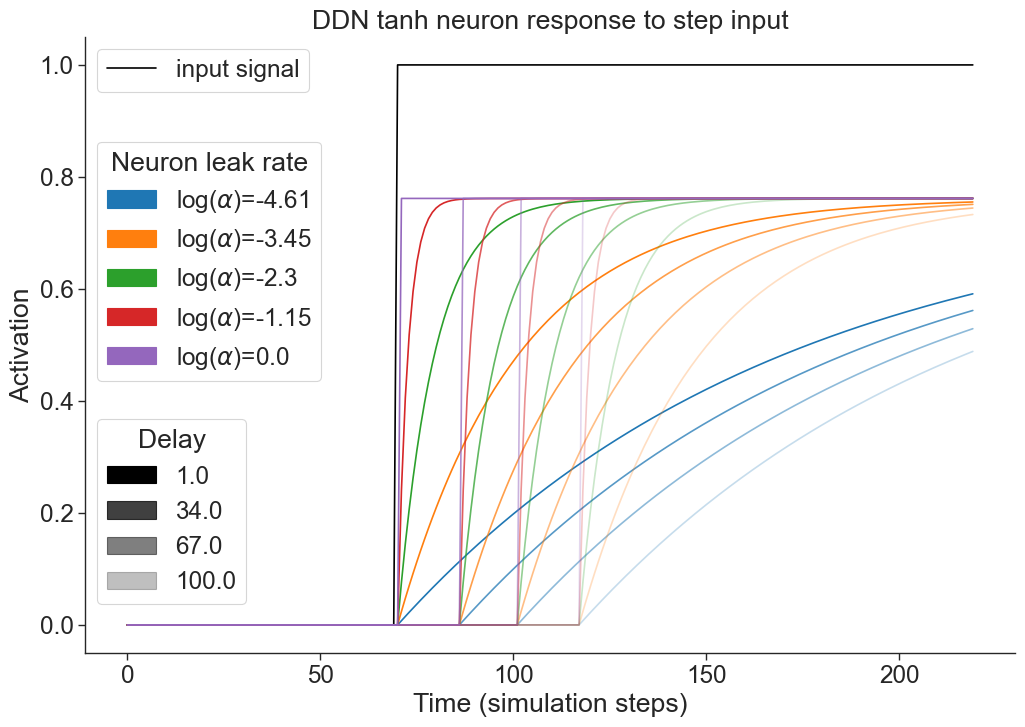

In [29]:
import matplotlib.patches as mpatches

sin_in = np.ones(shape=(400)) * 0
sin_in[150:] = 1
start = 80
stop = 300

tableau_colors = list(mcolors.TABLEAU_COLORS.keys())
# alpha_grid = np.linspace(0, 1, 5)
alpha_grid = np.logspace(-2, 0, 5)
delay_grid = np.linspace(1, 100, 4)
alpha_colors = {alpha: tableau_colors[i] for i, alpha in enumerate(alpha_grid)}

fix, ax = plt.subplots(figsize=(12, 8))
ax.plot(sin_in[start:stop], label='input signal', color='black')
alpha_out = {}
def linf(x):
    return x

# act_func = linf
# act_func = sigmoid_activation
opacity_patches = []
act_func = tanh_activation
dt_base = .01
for i, alpha in enumerate(alpha_grid):
    color = tableau_colors[i]
    for j, delay in enumerate(delay_grid):
        color_opac = 1 - j/4
        if i == 0:
            opacity_patches.append(mpatches.Patch(color='black', alpha=color_opac, label=delay))
        dt_scaled = dt_base / delay
        test_net = network_d1(alpha, dt_scaled, act_func)
        sim = NetworkSimulator(test_net, False)
        # sim.visualize(np.random.uniform(size=200))
        out = sim.get_network_data(sin_in)
        alpha_out[alpha] = out[0, :]

        ax.plot(out[0, start:stop], color=color, alpha=color_opac)
color_patches = [mpatches.Patch(color=color, label=r'log($\alpha$)=' + str(np.round(np.log(a), 2))) for a, color in alpha_colors.items()]
l1 = ax.legend(handles=color_patches, title='Neuron leak rate', loc='upper left', bbox_to_anchor=(0, 0.85))
ax.add_artist(l1)
l2 = ax.legend(handles=opacity_patches, title='Delay', loc='lower left', bbox_to_anchor=(0, 0.06))
ax.add_artist(l2)
ax.legend()
ax.set_ylabel('Activation')
ax.set_xlabel('Time (simulation steps)')
ax.set_title('DDN tanh neuron response to step input')
# plt.savefig("../figs_output/tanh_neuron_response.pdf")

Next for networks of the shape (in) ---> (A) -> (out)

Text(0.5, 1.0, 'DDN tanh neuron response to step input')

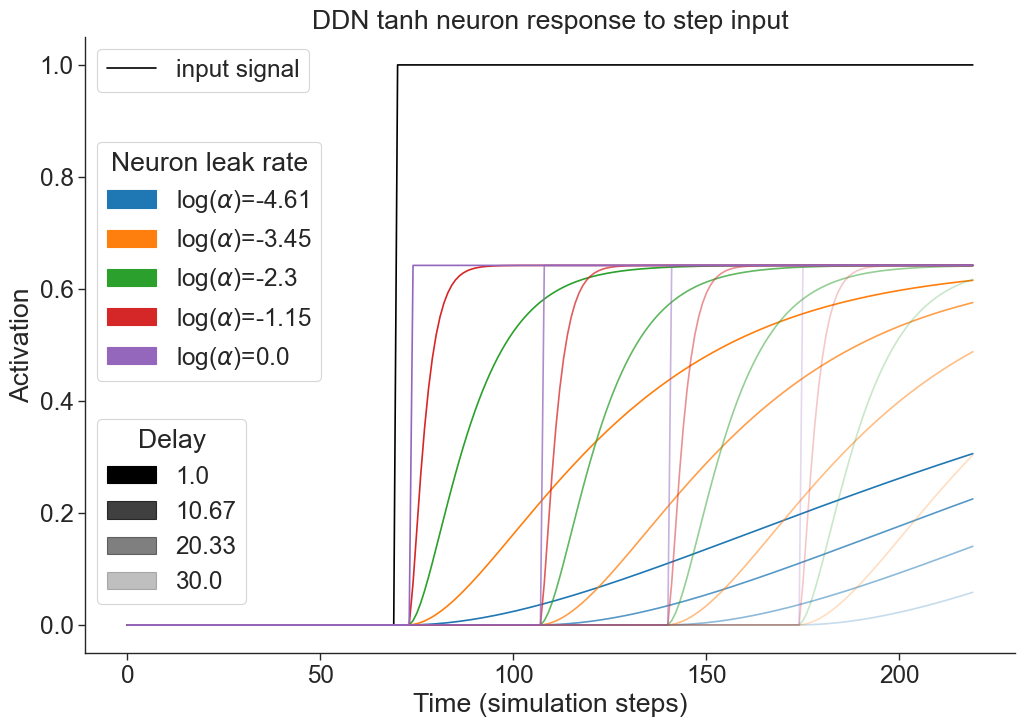

In [30]:
import matplotlib.patches as mpatches

sin_in = np.ones(shape=(400)) * 0
sin_in[150:] = 1
start = 80
stop = 300

tableau_colors = list(mcolors.TABLEAU_COLORS.keys())
# alpha_grid = np.linspace(0, 1, 5)
alpha_grid = np.logspace(-2, 0, 5)
delay_grid = np.linspace(1, 30, 4)
alpha_colors = {alpha: tableau_colors[i] for i, alpha in enumerate(alpha_grid)}

fix, ax = plt.subplots(figsize=(12, 8))
ax.plot(sin_in[start:stop], label='input signal', color='black')
alpha_out = {}
def linf(x):
    return x

# act_func = linf
# act_func = sigmoid_activation
opacity_patches = []
act_func = tanh_activation
dt_base = .01
for i, alpha in enumerate(alpha_grid):
    color = tableau_colors[i]
    for j, delay in enumerate(delay_grid):
        color_opac = 1 - j/4
        if i == 0:
            opacity_patches.append(mpatches.Patch(color='black', alpha=color_opac, label=np.round(delay,2)))
        dt_scaled = dt_base / delay
        test_net = network_d2(alpha, dt_scaled, act_func)
        sim = NetworkSimulator(test_net, False)
        # sim.visualize(np.random.uniform(size=200))
        out = sim.get_network_data(sin_in)
        alpha_out[alpha] = out[0, :]

        ax.plot(out[0, start:stop], color=color, alpha=color_opac)
color_patches = [mpatches.Patch(color=color, label=r'log($\alpha$)=' + str(np.round(np.log(a), 2))) for a, color in alpha_colors.items()]
l1 = ax.legend(handles=color_patches, title='Neuron leak rate', loc='upper left', bbox_to_anchor=(0, 0.85))
ax.add_artist(l1)
l2 = ax.legend(handles=opacity_patches, title='Delay', loc='lower left', bbox_to_anchor=(0, 0.06))
ax.add_artist(l2)
ax.legend()
ax.set_ylabel('Activation')
ax.set_xlabel('Time (simulation steps)')
ax.set_title('DDN tanh neuron response to step input')
# plt.savefig("../figs_output/tanh_neuron_response.pdf")

And again, for the net type of (in) ---> (A) -> (B) -> (out)

Text(0.5, 1.0, 'DDN tanh neuron response to step input')

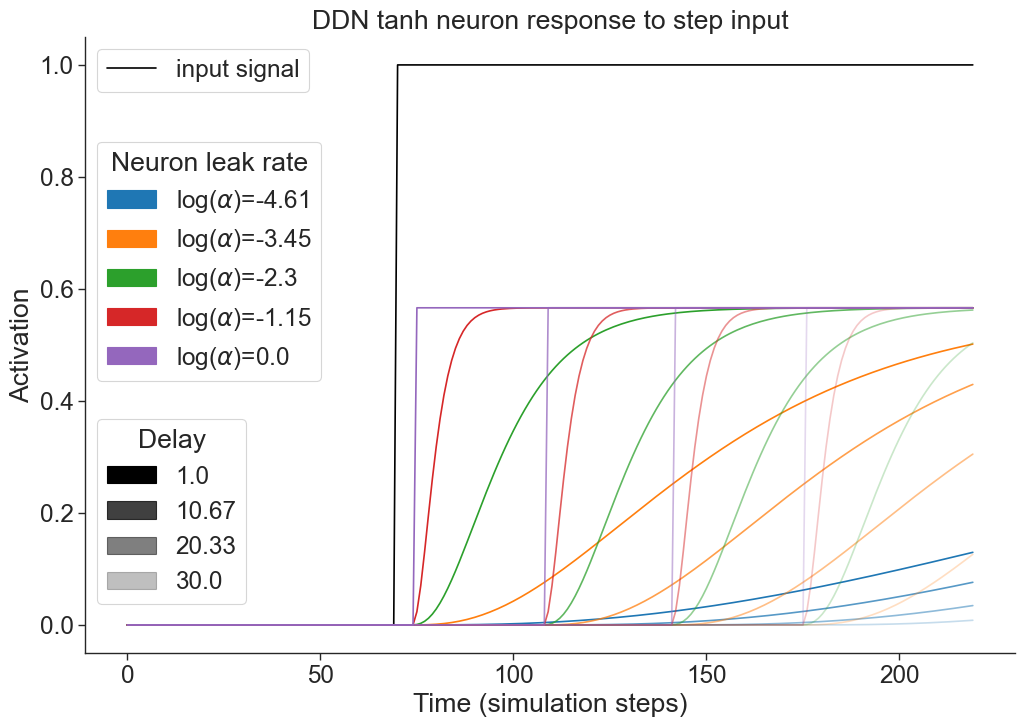

In [39]:
import matplotlib.patches as mpatches

sin_in = np.ones(shape=(400)) * 0
sin_in[150:] = 1
start = 80
stop = 300

tableau_colors = list(mcolors.TABLEAU_COLORS.keys())
# alpha_grid = np.linspace(0, 1, 5)
alpha_grid = np.logspace(-2, 0, 5)
delay_grid = np.linspace(1, 30, 4)
alpha_colors = {alpha: tableau_colors[i] for i, alpha in enumerate(alpha_grid)}

fix, ax = plt.subplots(figsize=(12, 8))
ax.plot(sin_in[start:stop], label='input signal', color='black')
alpha_out = {}
def linf(x):
    return x

# act_func = linf
# act_func = sigmoid_activation
opacity_patches = []
act_func = tanh_activation
dt_base = .01
for i, alpha in enumerate(alpha_grid):
    color = tableau_colors[i]
    for j, delay in enumerate(delay_grid):
        color_opac = 1 - j/4
        if i == 0:
            opacity_patches.append(mpatches.Patch(color='black', alpha=color_opac, label=np.round(delay,2)))
        dt_scaled = dt_base / delay
        test_net = network_d3(alpha, dt_scaled, act_func)
        sim = NetworkSimulator(test_net, False)
        # sim.visualize(np.random.uniform(size=200))
        out = sim.get_network_data(sin_in)
        alpha_out[alpha] = out[0, :]

        ax.plot(out[0, start:stop], color=color, alpha=color_opac)
color_patches = [mpatches.Patch(color=color, label=r'log($\alpha$)=' + str(np.round(np.log(a), 2))) for a, color in alpha_colors.items()]
l1 = ax.legend(handles=color_patches, title='Neuron leak rate', loc='upper left', bbox_to_anchor=(0, 0.85))
ax.add_artist(l1)
l2 = ax.legend(handles=opacity_patches, title='Delay', loc='lower left', bbox_to_anchor=(0, 0.06))
ax.add_artist(l2)
ax.legend()
ax.set_ylabel('Activation')
ax.set_xlabel('Time (simulation steps)')
ax.set_title('DDN tanh neuron response to step input')
# plt.savefig("../figs_output/tanh_neuron_response.pdf")

And a recurrent network, which looks like (in) ---> (A) <=> (B)

Text(0.5, 1.0, 'DDN tanh neuron response to step input')

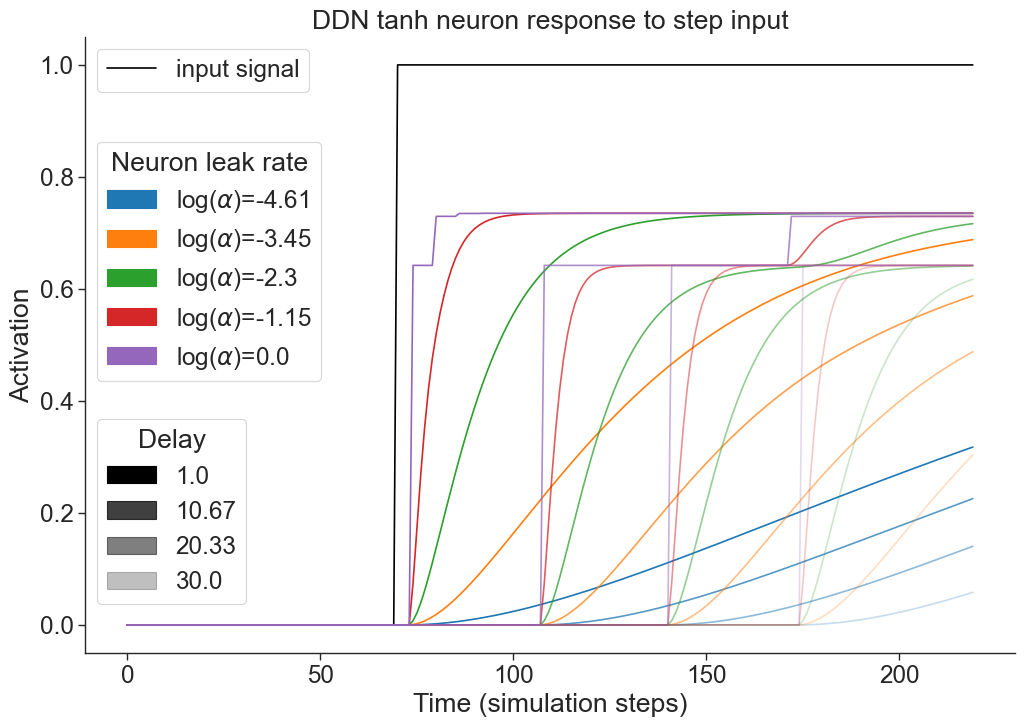

In [41]:
import matplotlib.patches as mpatches

sin_in = np.ones(shape=(400)) * 0
sin_in[150:] = 1
start = 80
stop = 300

tableau_colors = list(mcolors.TABLEAU_COLORS.keys())
# alpha_grid = np.linspace(0, 1, 5)
alpha_grid = np.logspace(-2, 0, 5)
delay_grid = np.linspace(1, 30, 4)
alpha_colors = {alpha: tableau_colors[i] for i, alpha in enumerate(alpha_grid)}

fix, ax = plt.subplots(figsize=(12, 8))
ax.plot(sin_in[start:stop], label='input signal', color='black')
alpha_out = {}
def linf(x):
    return x

# act_func = linf
# act_func = sigmoid_activation
opacity_patches = []
act_func = tanh_activation
dt_base = .01
for i, alpha in enumerate(alpha_grid):
    color = tableau_colors[i]
    for j, delay in enumerate(delay_grid):
        color_opac = 1 - j/4
        if i == 0:
            opacity_patches.append(mpatches.Patch(color='black', alpha=color_opac, label=np.round(delay,2)))
        dt_scaled = dt_base / delay
        test_net = network_r2(alpha, dt_scaled, act_func)
        sim = NetworkSimulator(test_net, False)
        # sim.visualize(np.random.uniform(size=200))
        out = sim.get_network_data(sin_in)
        alpha_out[alpha] = out[0, :]

        ax.plot(out[0, start:stop], color=color, alpha=color_opac)
color_patches = [mpatches.Patch(color=color, label=r'log($\alpha$)=' + str(np.round(np.log(a), 2))) for a, color in alpha_colors.items()]
l1 = ax.legend(handles=color_patches, title='Neuron leak rate', loc='upper left', bbox_to_anchor=(0, 0.85))
ax.add_artist(l1)
l2 = ax.legend(handles=opacity_patches, title='Delay', loc='lower left', bbox_to_anchor=(0, 0.06))
ax.add_artist(l2)
ax.legend()
ax.set_ylabel('Activation')
ax.set_xlabel('Time (simulation steps)')
ax.set_title('DDN tanh neuron response to step input')
# plt.savefig("../figs_output/tanh_neuron_response.pdf")

### Response to oscillating input

Text(0.5, 1.0, 'DDN tanh neuron response to step input')

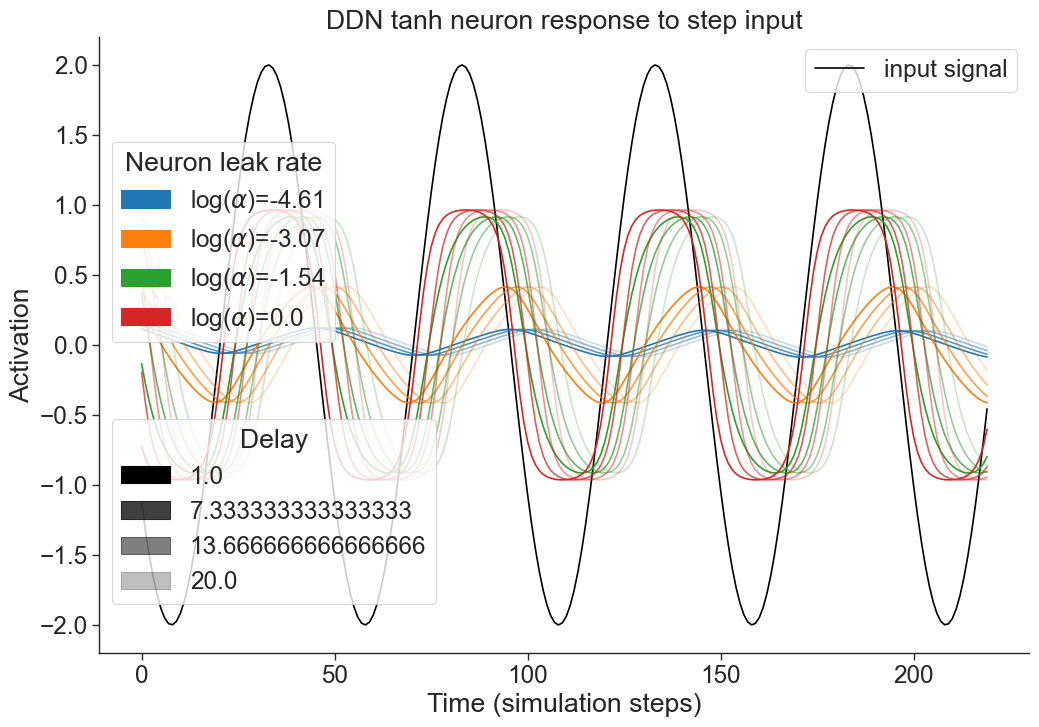

In [8]:
import matplotlib.patches as mpatches
t = np.linspace(0, 50, 400)
sin_in = np.sin(t) * 2
start = 80
stop = 300

tableau_colors = list(mcolors.TABLEAU_COLORS.keys())
# alpha_grid = np.linspace(0.01, 1, 5)
alpha_grid = np.logspace(-2., 0, 4)
delay_grid = np.linspace(1, 20, 4)
alpha_colors = {alpha: tableau_colors[i] for i, alpha in enumerate(alpha_grid)}

fix, ax = plt.subplots(figsize=(12, 8))
ax.plot(sin_in[start:stop], label='input signal', color='black')
alpha_out = {}
def linf(x):
    return x

# act_func = linf
# act_func = sigmoid_activation
opacity_patches = []
act_func = tanh_activation
dt_base = .01
for i, alpha in enumerate(alpha_grid):
    color = tableau_colors[i]
    for j, delay in enumerate(delay_grid):
        color_opac = 1 - j/4
        if i == 0:
            opacity_patches.append(mpatches.Patch(color='black', alpha=color_opac, label=delay))
        dt_scaled = dt_base / delay
        test_net = network_d1(alpha, dt_scaled, act_func)
        sim = NetworkSimulator(test_net, False)
        # sim.visualize(np.random.uniform(size=200))
        out = sim.get_network_data(sin_in)
        alpha_out[alpha] = out[0, :]

        ax.plot(out[0, start:stop], color=color, alpha=color_opac)
color_patches = [mpatches.Patch(color=color, label=r'log($\alpha$)=' + str(np.round(np.log(a), 2))) for a, color in alpha_colors.items()]
l1 = ax.legend(handles=color_patches, title='Neuron leak rate', loc='upper left', bbox_to_anchor=(0, 0.85))
ax.add_artist(l1)
l2 = ax.legend(handles=opacity_patches, title='Delay', loc='lower left', bbox_to_anchor=(0, 0.06))
ax.add_artist(l2)
ax.legend()
ax.set_ylabel('Activation')
ax.set_xlabel('Time (simulation steps)')
ax.set_title('DDN tanh neuron response to step input')
# plt.savefig("../figs_output/tanh_neuron_response.pdf")

### IPC
Let's explore how IPC changes as a function of alpha, delay and network type

In [9]:
def cap2vec(capacities,maxdel=1000,maxdeg=10):
    vec = np.zeros((maxdel,maxdeg))
    for idx in range(len(capacities)):
        delay=capacities[idx]['delay']
        degree=capacities[idx]['degree']
        if (delay<=maxdel) and (degree<=maxdeg):
            vec[delay-1,degree-1]+=capacities[idx]['score']
    return vec

def cap2mat(capacities,maxdel=1000,maxdeg=10,maxwin=10):
    vec = np.zeros((maxdel,maxwin,maxdeg))
    for idx in range(len(capacities)):
        delay=capacities[idx]['delay']
        degree=capacities[idx]['degree']
        win=capacities[idx]['window']
        if (delay<=maxdel) and (degree<=maxdeg) and (win<=maxwin):
            vec[delay-1, win-1, degree-1]+=capacities[idx]['score']
    return vec

Total score for degree  1  =  0.9804281867185172 (cumulative total =  0.9804281867185172 )
Total score for degree  2  =  0.0 (cumulative total =  0.9804281867185172 )
Total score for degree  3  =  0.021945204028302447 (cumulative total =  1.0023733907468195 )
Total capacity=1.002 (100.24 percent)


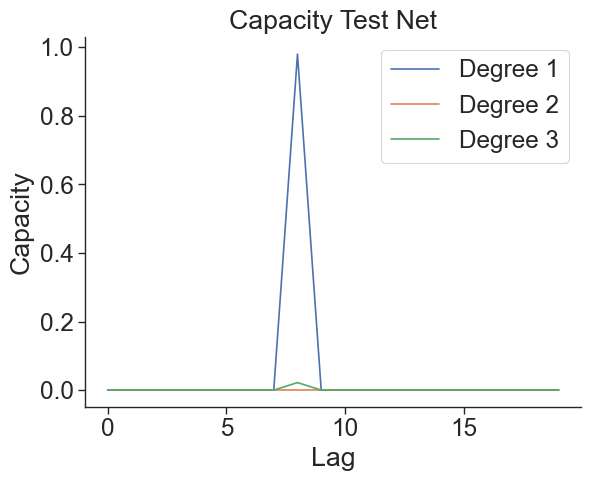

In [48]:
from utils import full_IPC
test_net = network_d3(1, .005, tanh_activation)
maxdel = 20
maxdeg = 3
ipc_in = np.random.uniform(low=-1, high=1, size=(10000,))
ipc = full_IPC(test_net, ipc_in, maxdel=maxdel, maxdeg=maxdeg, center=0, scale=1)

V = cap2vec(ipc, maxdel = maxdel, maxdeg = maxdeg)
plt.plot(V)
plt.ylabel('Capacity')
plt.xlabel('Lag')
plt.title('Capacity Test Net')
plt.legend(['Degree ' + str(i + 1) for i in range(maxdeg)])

Total score for degree  1  =  1.0177362673987533 (cumulative total =  1.0177362673987533 )
Total score for degree  2  =  0.0 (cumulative total =  1.0177362673987533 )
Total score for degree  3  =  0.0 (cumulative total =  1.0177362673987533 )
Total capacity=1.018 (101.77 percent)


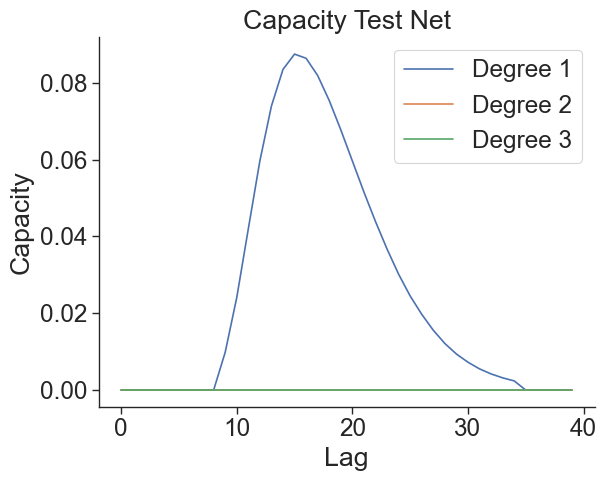

In [49]:
from utils import full_IPC
test_net = network_d3(.2, .005, tanh_activation)
maxdel = 40
maxdeg = 3
ipc_in = np.random.uniform(low=-1, high=1, size=(10000,))
ipc = full_IPC(test_net, ipc_in, maxdel=maxdel, maxdeg=maxdeg, center=0, scale=1)

V = cap2vec(ipc, maxdel = maxdel, maxdeg = maxdeg)
plt.plot(V)
plt.ylabel('Capacity')
plt.xlabel('Lag')
plt.title('Capacity Test Net')
plt.legend(['Degree ' + str(i + 1) for i in range(maxdeg)])

Total score for degree  1  =  0.9855130408354997 (cumulative total =  0.9855130408354997 )
Total score for degree  2  =  0.0 (cumulative total =  0.9855130408354997 )
Total score for degree  3  =  0.0 (cumulative total =  0.9855130408354997 )
Total capacity=0.986 (98.55 percent)


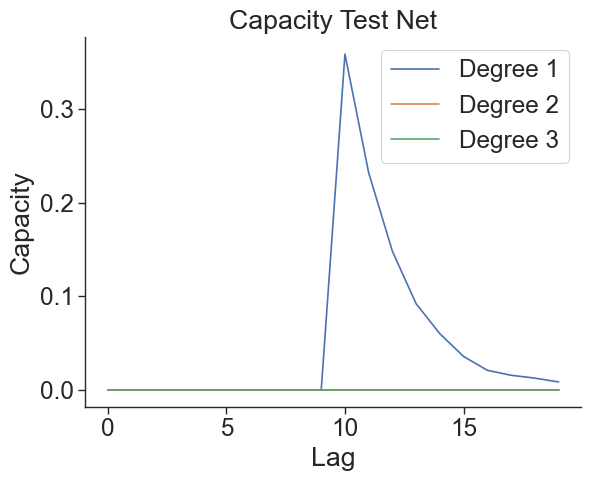

In [21]:
from utils import full_IPC
test_net = network_d1(.2, .0005, tanh_activation)
maxdel = 20
maxdeg = 3
ipc_in = np.random.uniform(low=-1, high=1, size=(10000,))
ipc = full_IPC(test_net, ipc_in, maxdel=maxdel, maxdeg=maxdeg, center=0, scale=1)

V = cap2vec(ipc, maxdel = maxdel, maxdeg = maxdeg)
plt.plot(V)
plt.ylabel('Capacity')
plt.xlabel('Lag')
plt.title('Capacity Test Net')
plt.legend(['Degree ' + str(i + 1) for i in range(maxdeg)])

Total score for degree  1  =  0.31332763232152616 (cumulative total =  0.31332763232152616 )
Total score for degree  2  =  0.0 (cumulative total =  0.31332763232152616 )
Total score for degree  3  =  0.006178280475878432 (cumulative total =  0.3195059127974046 )
Total score for degree  4  =  0.0 (cumulative total =  0.3195059127974046 )
Total capacity=0.320 (31.95 percent)


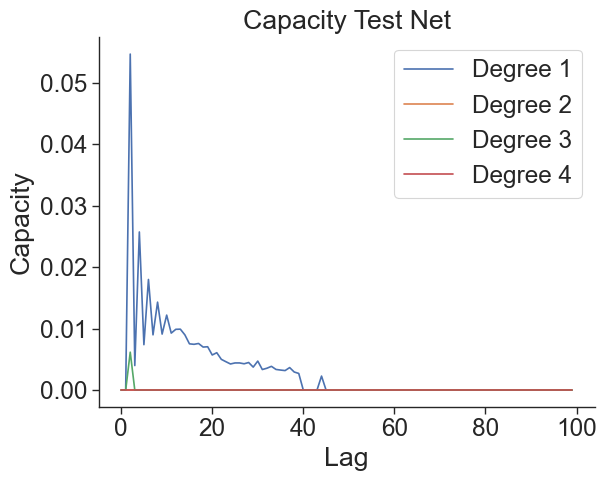

In [52]:
from utils import full_IPC
test_net = network_r2(.8, .5, tanh_activation)
maxdel = 100
maxdeg = 4
ipc_in = np.random.uniform(low=-1, high=1, size=(10000,))
ipc = full_IPC(test_net, ipc_in, maxdel=maxdel, maxdeg=maxdeg, center=0, scale=1)

V = cap2vec(ipc, maxdel = maxdel, maxdeg = maxdeg)
plt.plot(V)
plt.ylabel('Capacity')
plt.xlabel('Lag')
plt.title('Capacity Test Net')
plt.legend(['Degree ' + str(i + 1) for i in range(maxdeg)])